In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm

In [2]:
# Read in players data
players = pd.read_csv("data/players.csv")


In [3]:
# Add column market_value, initialize with 0
players["market_value"] = 0

In [8]:
# Scrape market_value from transfermarkt.de

# Fix headers
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

for ind, row in tqdm(players.iterrows()):
    try:
        url = row["url"]
        request_response = requests.get(url, headers=headers)
        
        # Parse request_response into beautifulsoup object
        html_content = BeautifulSoup(request_response.content, 'html.parser')
        
        # The find_all () method is able to return all tags that meet restrictions within parentheses
        market_value_html = html_content.find_all("div", {"class": "dataMarktwert"})[0]

        market_value = market_value_html.text.split("£")[1].split(" ")[0].strip('\t\r\n')

        if market_value.endswith("m"):
            market_value = float(market_value.split("m")[0]) * 1000000
        else:
            market_value = float(market_value.split("Th.")[0]) * 1000
        
        players.at[ind, "market_value"] = market_value
        
    except:
        pass
    

6879it [1:22:10,  1.40it/s]


In [10]:
players.tail()

,player_id,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,url,market_value
6874,265648,7775,pablo-santos,Pablo Santos,Brazil,Brazil,1992-03-18,Defender,Centre-Back,Left,188,https://www.transfermarkt.co.uk/pablo-santos/p...,2250000
6875,97925,7775,munir,Munir,Spain,Morocco,1989-05-10,Goalkeeper,NaN,Right,190,https://www.transfermarkt.co.uk/munir/profil/s...,1080000
6876,324341,7775,alexandros-katranis,Alexandros Katranis,Greece,Greece,1998-05-04,Defender,Left-Back,Left,174,https://www.transfermarkt.co.uk/alexandros-kat...,1440000
6877,286170,126,tarik-cetin,Tarik Cetin,Kadiköy,Turkey,1997-01-08,Goalkeeper,NaN,Right,193,https://www.transfermarkt.co.uk/tarik-cetin/pr...,450000
6878,616489,7775,yavuz-bugra-boyar,Yavuz Bugra Boyar,Erdemli,Turkey,1998-08-10,Goalkeeper,NaN,Right,190,https://www.transfermarkt.co.uk/yavuz-bugra-bo...,45000


In [12]:
players.to_csv("data/players_extended.csv", sep=",")

In [10]:
players = pd.read_csv("data/players_extended.csv", index_col=0)

In [11]:
players.head()

,player_id,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,url,market_value
0,680218,3057,matthieu-epolo,Matthieu Epolo,NaN,Belgium,2005-01-15,Goalkeeper,NaN,Right,0,https://www.transfermarkt.co.uk/matthieu-epolo...,0
1,468249,520,vitinho,Vitinho,Brazil,Brazil,1999-07-23,Defender,Right-Back,Right,175,https://www.transfermarkt.co.uk/vitinho/profil...,810000
2,469718,1184,gerardo-arteaga,Gerardo Arteaga,Mexico,Mexico,1998-09-07,Defender,Left-Back,Left,174,https://www.transfermarkt.co.uk/gerardo-arteag...,4500000
3,339943,520,ike-ugbo,Ike Ugbo,Lewisham,England,1998-09-21,Attack,Centre-Forward,Right,186,https://www.transfermarkt.co.uk/ike-ugbo/profi...,4050000
4,482072,520,kevin-denkey,Kevin Denkey,Togo,Togo,2000-11-30,Attack,Centre-Forward,Right,181,https://www.transfermarkt.co.uk/kevin-denkey/p...,1980000


In [12]:
# Read in players data
clubs = pd.read_csv("data/clubs.csv")

In [15]:
clubs.head()

,club_id,name,pretty_name,domestic_competition,league_id
0,2282,fc-brugge,Fc Brugge,BE1,BE1
1,1184,krc-genk,Krc Genk,BE1,BE1
2,58,rsc-anderlecht,Rsc Anderlecht,BE1,BE1
3,3057,standard-luttich,Standard Luttich,BE1,BE1
4,157,kaa-gent,Kaa Gent,BE1,BE1


In [16]:
# Select only players from the top leagues (England, Spain, Germany, Italy, France)
top_league_ids = ["GB1", "ES1", "L1", "IT1", "FR1"]
top_league_teams = clubs[clubs["league_id"].isin(top_league_ids)]

In [17]:
top_league_teams

,club_id,name,pretty_name,domestic_competition,league_id
34,27,fc-bayern-munchen,Fc Bayern Munchen,L1,L1
35,16,borussia-dortmund,Borussia Dortmund,L1,L1
36,23826,rasenballsport-leipzig,Rasenballsport Leipzig,L1,L1
37,15,bayer-04-leverkusen,Bayer 04 Leverkusen,L1,L1
38,18,borussia-monchengladbach,Borussia Monchengladbach,L1,L1
...,...,...,...,...,...
215,1038,sampdoria-genua,Sampdoria Genua,IT1,IT1
216,252,genua-cfc,Genua Cfc,IT1,IT1
217,3522,spezia-calcio,Spezia Calcio,IT1,IT1
218,4171,benevento-calcio,Benevento Calcio,IT1,IT1


In [39]:
market_values_team = players[["club_id", "market_value"]].groupby(["club_id"], as_index=False).sum()
market_values_team_dict = dict(zip(market_values_team["club_id"], market_values_team["market_value"]))


In [41]:
# Add market value for each team
top_league_teams["market_value"] = 0
for ind, row in top_league_teams.iterrows():
    club_id = row["club_id"]
    top_league_teams.at[ind, "market_value"] = market_values_team_dict[club_id]

<ipython-input-41-e58603a3b038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_league_teams["market_value"] = 0


In [42]:
top_league_teams

,club_id,name,pretty_name,domestic_competition,league_id,market_value
34,27,fc-bayern-munchen,Fc Bayern Munchen,L1,L1,732330000
35,16,borussia-dortmund,Borussia Dortmund,L1,L1,561870000
36,23826,rasenballsport-leipzig,Rasenballsport Leipzig,L1,L1,504855000
37,15,bayer-04-leverkusen,Bayer 04 Leverkusen,L1,L1,333675000
38,18,borussia-monchengladbach,Borussia Monchengladbach,L1,L1,266355000
...,...,...,...,...,...,...
215,1038,sampdoria-genua,Sampdoria Genua,IT1,IT1,98730000
216,252,genua-cfc,Genua Cfc,IT1,IT1,83768000
217,3522,spezia-calcio,Spezia Calcio,IT1,IT1,62505000
218,4171,benevento-calcio,Benevento Calcio,IT1,IT1,44460000


In [43]:
games = pd.read_csv("data/games.csv")

In [47]:
# Filter on top leagues
games = games[games["league_code"].isin(top_league_ids)]

In [55]:
games["market_value_home"] = 0
games["market_value_away"] = 0

for ind, row in games.iterrows():
    home_club_id = row["home_club_id"]
    away_club_id = row["away_club_id"]
    games.at[ind, "market_value_home"] = market_values_team_dict[home_club_id]
    games.at[ind, "market_value_away"] = market_values_team_dict[away_club_id]

<ipython-input-55-9f1c60fef7d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["market_value_home"] = 0
<ipython-input-55-9f1c60fef7d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["market_value_away"] = 0


In [56]:
games.head()

,game_id,league_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,url,market_value_home,market_value_away
5,3433564,IT1,2020,38. Matchday,2021-05-23,6195,276,1,1,https://www.transfermarkt.co.uk/ssc-napoli_hel...,470880000,135360000
6,3451482,ES1,2020,38. Matchday,2021-05-23,368,1108,1,0,https://www.transfermarkt.co.uk/sevilla-fc_dep...,328860000,64980000
7,3412882,L1,2020,34. Matchday,2021-05-22,79,10,0,2,https://www.transfermarkt.co.uk/vfb-stuttgart_...,170325000,50085000
11,3429872,GB1,2020,38. Matchday,2021-05-23,543,985,1,2,https://www.transfermarkt.co.uk/wolverhampton-...,351900000,770895000
12,3429871,GB1,2020,38. Matchday,2021-05-23,379,180,3,0,https://www.transfermarkt.co.uk/west-ham-unite...,179100000,237690000


In [51]:
appearances = pd.read_csv("data/appearances.csv")

In [53]:
# Filter on top leagues
appearances = appearances[appearances["league_id"].isin(top_league_ids)]

In [57]:
player_market_values_dict = dict(zip(players["player_id"], players["market_value"]))



In [61]:
appearances["weighted_market_value"] = 0

for ind, row in appearances.iterrows():
    player_market_value = player_market_values_dict[row["player_id"]]
    player_weighted_market_value = player_market_value * (row["minutes_played"]/90)
    appearances.at[ind, "weighted_market_value"] = player_weighted_market_value

<ipython-input-61-850d14d03fd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appearances["weighted_market_value"] = 0


In [62]:
appearances.head()

,player_id,game_id,appearance_id,league_id,player_club_id,goals,assists,minutes_played,yellow_cards,red_cards,url,weighted_market_value
76,293281,3412938,31448,L1,533,0,0,30,0,0,https://www.transfermarkt.co.uk/jacob-bruun-la...,1650000
91,293281,3412962,20027,L1,533,0,0,59,0,0,https://www.transfermarkt.co.uk/jacob-bruun-la...,3245000
101,482072,3393968,20032,FR1,1160,1,1,90,0,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,1980000
102,482072,3394575,20033,FR1,1160,0,0,90,1,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,1980000
103,482072,3394585,2821,FR1,1160,0,0,56,1,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,1232000


In [65]:
appearances_weighted_market_value = appearances[["game_id", "player_club_id", "weighted_market_value"]].groupby(["game_id", "player_club_id"], as_index=False).sum()

In [66]:
appearances_weighted_market_value

,game_id,player_club_id,weighted_market_value
0,3393959,244,120319999
1,3393959,618,74527000
2,3393960,273,112054998
3,3393960,1082,188787999
4,3393961,347,46269000
...,...,...,...
3647,3451482,1108,26264999
3648,3460087,405,269504999
3649,3460087,931,85580000
3650,3565111,273,92553000


In [72]:
app = appearances_weighted_market_value[appearances_weighted_market_value["game_id"] == 3393959][["player_club_id", "weighted_market_value"]]
appearances_weighted_market_values_dict = dict(zip(app["player_club_id"], app["weighted_market_value"]))

In [73]:
appearances_weighted_market_values_dict

{244: 120319999, 618: 74527000}

In [74]:
games["weighted_market_value_home"] = 0
games["weighted_market_value_away"] = 0

for ind, row in games.iterrows():
    weighted_market_values = appearances_weighted_market_value[appearances_weighted_market_value["game_id"] == row["game_id"]][["player_club_id", "weighted_market_value"]]
    weighted_market_values_dict = dict(zip(weighted_market_values["player_club_id"], weighted_market_values["weighted_market_value"]))

    home_club_id = row["home_club_id"]
    away_club_id = row["away_club_id"]
    games.at[ind, "weighted_market_value_home"] = weighted_market_values_dict[home_club_id]
    games.at[ind, "weighted_market_value_away"] = weighted_market_values_dict[away_club_id]

In [75]:
games.head()

,game_id,league_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,url,market_value_home,market_value_away,weighted_market_value_home,weighted_market_value_away
5,3433564,IT1,2020,38. Matchday,2021-05-23,6195,276,1,1,https://www.transfermarkt.co.uk/ssc-napoli_hel...,470880000,135360000,304569999,55716997
6,3451482,ES1,2020,38. Matchday,2021-05-23,368,1108,1,0,https://www.transfermarkt.co.uk/sevilla-fc_dep...,328860000,64980000,176530000,26264999
7,3412882,L1,2020,34. Matchday,2021-05-22,79,10,0,2,https://www.transfermarkt.co.uk/vfb-stuttgart_...,170325000,50085000,71503000,35543000
11,3429872,GB1,2020,38. Matchday,2021-05-23,543,985,1,2,https://www.transfermarkt.co.uk/wolverhampton-...,351900000,770895000,199506000,135940000
12,3429871,GB1,2020,38. Matchday,2021-05-23,379,180,3,0,https://www.transfermarkt.co.uk/west-ham-unite...,179100000,237690000,187800000,155360000


In [77]:
games[games["game_id"] == 3429872]["url"]

11    https://www.transfermarkt.co.uk/wolverhampton-...
Name: url, dtype: object

In [81]:
market_values_team_dict[543]

351900000

In [84]:
players.columns

Index(['player_id', 'club_id', 'name', 'pretty_name', 'country_of_birth',
       'country_of_citizenship', 'date_of_birth', 'position', 'sub_position',
       'foot', 'height_in_cm', 'url', 'market_value'],
      dtype='object')

In [89]:
from datetime import datetime

def calc_age(date_of_birth, current_date):
    try:
        date_of_birth = datetime.strptime(date_of_birth, "%Y-%m-%d")
    except:
        return None
    return current_date.year - date_of_birth.year - ((current_date.month, current_date.day) < (date_of_birth.month, date_of_birth.day))

In [90]:
players["games"] = 0
players["minutes_played"] = 0
players["goals"] = 0
players["assists"] = 0
players["wins"] = 0
players["draws"] = 0
players["losses"] = 0
players["yellow_cards"] = 0
players["red_cards"] = 0
players["age"] = None

# current_date will be chosen as the production date of data  
current_date = "2021-06-08"
current_date = datetime.strptime(current_date, "%Y-%m-%d")

for ind, row in players.iterrows():
    age = calc_age(row["date_of_birth"], current_date)
    players.at[ind, "age"] = age
    





In [91]:
players

,player_id,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,...,minutes_played,minutes_played_avg,goals,assists,wins,draws,losses,yellow_cards,red_cards,age
0,680218,3057,matthieu-epolo,Matthieu Epolo,NaN,Belgium,2005-01-15,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,0,16
1,468249,520,vitinho,Vitinho,Brazil,Brazil,1999-07-23,Defender,Right-Back,Right,...,0,0,0,0,0,0,0,0,0,21
2,469718,1184,gerardo-arteaga,Gerardo Arteaga,Mexico,Mexico,1998-09-07,Defender,Left-Back,Left,...,0,0,0,0,0,0,0,0,0,22
3,339943,520,ike-ugbo,Ike Ugbo,Lewisham,England,1998-09-21,Attack,Centre-Forward,Right,...,0,0,0,0,0,0,0,0,0,22
4,482072,520,kevin-denkey,Kevin Denkey,Togo,Togo,2000-11-30,Attack,Centre-Forward,Right,...,0,0,0,0,0,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,265648,7775,pablo-santos,Pablo Santos,Brazil,Brazil,1992-03-18,Defender,Centre-Back,Left,...,0,0,0,0,0,0,0,0,0,29
6875,97925,7775,munir,Munir,Spain,Morocco,1989-05-10,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,0,32
6876,324341,7775,alexandros-katranis,Alexandros Katranis,Greece,Greece,1998-05-04,Defender,Left-Back,Left,...,0,0,0,0,0,0,0,0,0,23
6877,286170,126,tarik-cetin,Tarik Cetin,Kadiköy,Turkey,1997-01-08,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,0,24


In [93]:
appearances.head(10)

,player_id,game_id,appearance_id,league_id,player_club_id,goals,assists,minutes_played,yellow_cards,red_cards,url,weighted_market_value
76,293281,3412938,31448,L1,533,0,0,30,0,0,https://www.transfermarkt.co.uk/jacob-bruun-la...,1650000
91,293281,3412962,20027,L1,533,0,0,59,0,0,https://www.transfermarkt.co.uk/jacob-bruun-la...,3245000
101,482072,3393968,20032,FR1,1160,1,1,90,0,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,1980000
102,482072,3394575,20033,FR1,1160,0,0,90,1,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,1980000
103,482072,3394585,2821,FR1,1160,0,0,56,1,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,1232000
104,482072,3394609,2822,FR1,1160,0,0,24,0,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,528000
105,482072,3394614,2823,FR1,1160,0,0,63,0,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,1386000
106,482072,3394641,2824,FR1,1160,0,0,65,0,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,1430000
107,482072,3394647,2825,FR1,1160,0,0,23,0,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,505999
108,482072,3394652,2826,FR1,1160,0,0,45,0,0,https://www.transfermarkt.co.uk/kevin-denkey/l...,990000


In [105]:
player_stats = appearances[["player_id", "minutes_played", "goals", "assists", "yellow_cards", "red_cards"]].groupby("player_id").sum()

In [106]:
player_stats

,minutes_played,goals,assists,yellow_cards,red_cards
player_id,,,,,
3333,1061,0,1,3,0
3455,1497,15,2,2,1
4357,591,2,1,2,0
4811,2114,0,1,4,2
5017,1218,0,0,3,0
...,...,...,...,...,...
847759,523,0,0,4,0
854973,1,0,0,0,0
862880,42,0,0,0,0


In [113]:
game_stats = appearances[["player_id", "game_id"]].groupby("player_id").count()

In [114]:
game_stats

,game_id
player_id,
3333,26
3455,19
4357,9
4811,29
5017,18
...,...
847759,13
854973,1
862880,3


In [115]:
for ind, row in players.iterrows():
    player_id = row["player_id"]
    try:
        players.at[ind, "minutes_played"] = player_stats.loc[player_id]["minutes_played"]
        players.at[ind, "goals"] = player_stats.loc[player_id]["goals"]
        players.at[ind, "assists"] = player_stats.loc[player_id]["assists"]
        players.at[ind, "yellow_cards"] = player_stats.loc[player_id]["yellow_cards"]
        players.at[ind, "red_cards"] = player_stats.loc[player_id]["red_cards"]
        players.at[ind, "games"] = game_stats.loc[player_id]["game_id"]
    except:
        pass


In [117]:
players["games"].head(10)

0     0
1     0
2     0
3     0
4    10
5     0
6     0
7     0
8     2
9     0
Name: games, dtype: int64

In [112]:
games.head()

,game_id,league_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,url,market_value_home,market_value_away,weighted_market_value_home,weighted_market_value_away
5,3433564,IT1,2020,38. Matchday,2021-05-23,6195,276,1,1,https://www.transfermarkt.co.uk/ssc-napoli_hel...,470880000,135360000,304569999,55716997
6,3451482,ES1,2020,38. Matchday,2021-05-23,368,1108,1,0,https://www.transfermarkt.co.uk/sevilla-fc_dep...,328860000,64980000,176530000,26264999
7,3412882,L1,2020,34. Matchday,2021-05-22,79,10,0,2,https://www.transfermarkt.co.uk/vfb-stuttgart_...,170325000,50085000,71503000,35543000
11,3429872,GB1,2020,38. Matchday,2021-05-23,543,985,1,2,https://www.transfermarkt.co.uk/wolverhampton-...,351900000,770895000,199506000,135940000
12,3429871,GB1,2020,38. Matchday,2021-05-23,379,180,3,0,https://www.transfermarkt.co.uk/west-ham-unite...,179100000,237690000,187800000,155360000


In [135]:
mask = games['game_id'] == 3433564

game = games[mask]

home_goals = game["home_club_goals"]
away_goals = game["away_club_goals"]

if 

,game_id,league_code,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,url,market_value_home,market_value_away,weighted_market_value_home,weighted_market_value_away
5,3433564,IT1,2020,38. Matchday,2021-05-23,6195,276,1,1,https://www.transfermarkt.co.uk/ssc-napoli_hel...,470880000,135360000,304569999,55716997


In [147]:
p = appearances[["player_id", "game_id", "player_club_id"]].groupby(["player_id", "player_club_id"])["game_id"].apply(list).reset_index(name='games')

In [148]:
p

,player_id,player_club_id,games
0,3333,31,"[3420840, 3421697, 3421704, 3421728, 3421737, ..."
1,3455,5,"[3433190, 3433217, 3433232, 3433243, 3433251, ..."
2,4357,33,"[3413169, 3413032, 3413003, 3412986, 3412969, ..."
3,4811,969,"[3394586, 3393965, 3394608, 3394614, 3394623, ..."
4,5017,86,"[3412890, 3412926, 3412962, 3412976, 3412998, ..."
...,...,...,...
2629,847759,40,"[3394727, 3394771, 3394776, 3394792, 3394803, ..."
2630,854973,2969,[3395001]
2631,862880,1160,"[3394978, 3394992, 3394998]"
2632,882772,2687,[3451478]


In [160]:
p

,player_id,player_club_id,games
0,3333,31,"[3420840, 3421697, 3421704, 3421728, 3421737, ..."
1,3455,5,"[3433190, 3433217, 3433232, 3433243, 3433251, ..."
2,4357,33,"[3413169, 3413032, 3413003, 3412986, 3412969, ..."
3,4811,969,"[3394586, 3393965, 3394608, 3394614, 3394623, ..."
4,5017,86,"[3412890, 3412926, 3412962, 3412976, 3412998, ..."
...,...,...,...
2629,847759,40,"[3394727, 3394771, 3394776, 3394792, 3394803, ..."
2630,854973,2969,[3395001]
2631,862880,1160,"[3394978, 3394992, 3394998]"
2632,882772,2687,[3451478]


In [169]:
results_dict = {}
for ind, row in p.iterrows():
    player_id = row["player_id"]
    results_dict[player_id] = {"wins": 0, "draws": 0, "losses": 0}
    for game_played in row["games"]:
        mask = games['game_id'] == game_played
        game = games[mask]

        home_goals = int(game["home_club_goals"])
        away_goals = int(game["away_club_goals"])
        
        print(home_goals)
        print(away_goals)
        if home_goals > away_goals:
            result = "home"
        elif home_goals < away_goals:
            result = "away"
        else:
            result = "draw"
        
        if row["player_club_id"] == int(game["home_club_id"]):
            if result == "home":
                results_dict[player_id]["wins"] += 1
            elif result == "away":
                results_dict[player_id]["losses"] += 1
            else:
                results_dict[player_id]["draws"] += 1
        elif row["player_club_id"] == int(game["away_club_id"]):
            if result == "home":
                results_dict[player_id]["losses"] += 1
            elif result == "away":
                results_dict[player_id]["wins"] += 1
            else:
                results_dict[player_id]["draws"] += 1
        else:
            print(f"player_club_id: {row['player_club_id']}\nhome_club_id: {game['home_club_id']}\naway_club_id: {game['away_club_id']}")

0
2
3
1
7
2
2
1
2
1
1
1
3
0
1
1
0
0
1
0
0
0
1
3
1
3
0
1
1
4
3
1
0
2
0
1
0
1
0
1
0
3
2
1
1
1
1
1
0
3
2
0
2
0
1
2
3
3
1
2
2
2
1
3
2
0
0
2
0
3
1
2
4
0
2
0
0
3
1
2
2
3
1
1
1
3
2
0
0
3
1
1
0
3
2
1
1
0
4
0
1
0
4
2
1
2
4
3
3
1
2
1
2
2
0
1
1
1
0
4
4
3
0
1
2
3
2
2
2
3
3
1
1
1
4
0
1
2
1
1
4
2
1
2
2
1
0
0
1
1
1
1
3
1
1
1
3
3
1
1
2
3
0
0
1
2
1
4
1
0
1
1
1
1
1
1
2
0
1
0
1
4
1
1
0
0
1
3
1
4
4
1
0
1
3
1
0
0
2
0
2
4
1
1
1
4
2
0
0
4
3
0
2
1
3
1
1
3
1
2
2
5
0
1
1
4
1
0
3
0
1
2
1
2
3
0
0
2
1
1
2
3
2
1
1
1
1
2
1
2
1
1
3
2
0
1
1
0
3
0
1
1
1
3
1
1
2
3
1
0
4
3
0
1
3
2
2
2
1
0
4
2
1
1
1
2
0
0
1
2
3
2
3
1
0
3
4
0
3
2
6
0
1
2
2
4
0
1
2
0
2
3
0
2
0
3
2
0
3
1
5
2
4
0
0
2
0
2
1
1
1
0
2
2
1
0
1
0
0
1
3
2
1
0
2
0
1
1
1
1
2
2
0
0
1
1
2
1
1
0
2
1
3
4
1
1
0
2
1
2
1
2
1
1
2
0
3
2
1
1
0
2
3
0
2
1
1
3
1
0
3
1
1
0
2
0
3
1
3
2
0
1
2
1
0
1
5
3
5
2
3
0
4
3
2
0
2
0
1
3
2
2
1
1
3
0
2
2
1
4
1
1
2
0
2
1
1
3
1
1
0
4
0
3
4
1
1
3
3
1
2
0
2
0
0
2
2
0
1
0
3
0
1
1
3
0
3
1
1
3
0
1
2
2
2
1
3
1
3
1
1
1
1
2
0
3
1
3
3
2
1
1
1
1
2
1
2
1
2
1


4
1
1
1
5
0
3
3
1
1
0
2
4
1
0
2
4
1
1
1
4
2
0
0
1
2
0
1
3
4
0
2
5
0
2
1
1
1
0
0
4
1
1
0
3
2
2
2
2
2
0
0
3
0
1
2
0
0
2
2
0
0
0
4
0
2
1
1
0
2
2
0
0
3
2
1
3
3
2
2
1
3
3
1
3
4
1
0
2
5
1
3
3
0
2
0
4
1
1
0
3
4
2
1
3
2
0
1
1
2
1
0
3
1
1
5
2
2
1
1
0
0
1
0
2
0
1
1
2
0
1
0
3
1
3
1
0
1
1
0
4
1
1
1
5
0
3
3
2
2
1
4
4
2
3
3
3
4
2
0
1
1
2
3
1
2
3
0
1
1
0
1
0
0
0
0
1
0
2
0
1
3
0
1
3
2
3
0
2
1
2
0
3
1
0
2
1
2
3
2
3
0
2
1
2
1
0
3
0
1
2
2
2
5
1
1
0
1
1
0
1
1
2
0
0
3
4
0
1
1
1
1
3
2
1
1
2
1
2
1
0
2
0
0
2
3
1
2
0
1
2
1
0
1
1
0
0
3
0
2
0
0
1
4
1
1
2
0
0
0
1
2
0
1
0
2
1
1
2
3
2
0
0
3
0
0
2
0
2
0
0
2
2
2
0
3
2
0
1
3
2
0
0
1
2
1
4
1
1
1
0
0
0
0
1
2
2
2
2
2
1
1
3
1
1
0
0
5
0
1
1
1
1
0
0
2
1
1
2
1
2
3
0
1
6
0
0
0
1
3
1
0
1
1
1
3
2
2
2
0
1
2
1
1
2
1
2
0
0
0
1
0
0
3
0
0
2
2
1
1
1
0
1
2
1
1
3
1
2
1
2
2
2
0
4
3
1
2
0
2
3
4
0
1
4
1
0
0
0
2
1
1
1
2
1
2
1
1
1
1
3
0
1
2
0
2
0
1
2
0
3
1
2
1
2
0
5
2
0
3
1
2
4
0
2
0
2
1
1
2
3
0
0
7
0
0
0
2
2
0
1
2
0
1
1
0
2
0
1
0
2
1
2
1
4
0
1
1
0
2
2
2
3
1
1
1
0
1
1
0
2
3
5
1
2
1
0
4
1
1


2
1
0
0
1
2
1
0
1
1
4
1
0
0
0
1
2
3
0
1
1
0
0
4
1
1
2
1
2
0
1
2
0
0
1
2
1
0
1
0
3
1
3
2
0
1
1
0
0
3
0
2
3
0
3
2
2
2
1
3
0
1
2
0
0
0
4
0
1
1
3
0
0
1
4
0
3
2
3
0
0
2
1
2
2
4
0
1
3
2
1
3
1
1
4
0
0
2
1
0
1
3
1
2
4
0
4
1
0
0
4
0
1
0
1
2
0
0
0
0
1
4
2
1
3
2
1
3
2
0
0
2
1
0
1
3
2
0
0
0
1
0
1
3
1
0
1
1
1
0
2
1
0
2
0
2
0
0
0
0
3
1
2
0
3
0
1
0
3
1
0
2
0
2
1
1
1
2
1
1
2
1
1
0
3
1
0
3
4
0
1
2
3
0
0
2
4
2
3
2
2
3
4
3
3
2
0
1
0
3
1
3
1
0
1
0
0
1
1
4
5
0
1
2
1
1
1
1
5
2
2
1
0
4
4
1
0
1
3
3
2
1
5
1
4
2
1
3
4
0
0
1
1
1
2
3
2
0
2
1
5
2
2
1
1
3
1
1
2
1
0
1
1
1
1
3
2
1
1
1
5
0
1
1
2
2
1
1
3
3
1
1
2
1
3
3
0
2
2
1
0
2
3
1
2
2
1
5
3
1
1
3
2
0
2
1
2
1
1
1
1
1
5
2
1
2
4
3
4
0
2
0
3
1
1
1
4
3
2
3
1
1
4
0
3
0
1
1
2
2
2
0
0
2
4
1
1
3
5
0
2
1
2
2
2
1
3
0
2
1
0
0
0
1
1
2
2
0
2
1
1
0
1
1
3
0
1
4
2
2
3
1
0
1
1
6
3
3
0
1
2
1
0
1
2
0
0
0
2
0
1
1
2
1
0
2
1
1
3
0
1
1
1
0
0
1
3
0
0
1
4
1
2
1
0
2
1
3
2
2
2
0
0
1
2
1
2
1
3
2
1
0
1
1
4
1
4
0
3
2
3
0
2
1
0
1
2
5
3
0
2
3
3
1
1
2
2
1
3
4
2
2
0
2
2
0
1
0
0
0
0
4
4
0
3
0
0
3
0
1


2
1
1
0
6
0
2
1
1
1
0
2
2
1
3
0
3
3
1
4
2
3
1
1
2
3
3
1
1
2
3
3
2
0
0
0
0
2
0
0
3
1
3
4
1
1
2
1
2
4
2
1
0
3
2
2
1
2
2
1
3
0
0
1
1
1
0
2
0
1
2
1
0
3
1
0
0
0
1
1
0
0
0
2
2
1
1
2
1
0
1
3
2
2
1
0
0
3
1
0
1
1
2
1
4
0
2
1
2
4
0
1
0
4
2
0
0
1
1
5
3
0
5
0
0
1
1
2
3
1
3
0
3
4
0
2
1
1
1
2
0
2
1
1
1
1
2
1
2
2
0
3
2
5
3
1
0
2
2
3
0
3
0
1
4
3
1
1
2
2
1
0
1
0
1
2
2
3
1
4
1
1
0
2
0
1
0
2
1
0
1
1
1
2
0
3
1
5
0
1
1
3
2
0
0
0
0
2
1
1
2
1
1
2
3
0
0
1
2
1
0
0
3
0
1
3
0
0
2
2
0
1
0
1
0
0
1
1
3
0
0
3
0
1
2
0
3
0
3
2
1
2
1
3
3
3
4
0
3
3
0
0
3
0
1
1
1
3
0
1
0
0
2
0
0
1
1
2
2
0
1
1
0
0
0
1
2
0
0
0
2
5
1
4
0
1
1
2
0
1
2
1
2
1
1
1
0
2
1
1
0
0
0
0
2
2
4
1
4
1
1
1
1
1
0
1
0
0
0
2
3
1
1
0
0
2
2
1
6
1
1
1
0
1
1
1
2
0
1
3
3
1
3
3
0
1
2
0
2
0
2
1
2
0
2
2
3
1
2
2
1
2
3
2
2
1
2
1
1
0
2
1
0
3
1
2
4
1
2
1
1
2
0
1
2
1
1
4
4
2
0
0
1
3
2
0
0
0
0
2
3
1
3
1
0
3
1
1
1
1
3
1
2
2
0
1
0
2
0
1
1
4
0
1
2
1
3
1
0
2
2
1
1
1
0
1
2
1
3
1
2
0
1
0
0
0
2
0
2
3
2
3
1
4
1
1
0
2
1
1
2
2
3
3
2
2
1
0
1
4
2
2
3
0
2
1
1
1
5
1
4
0
1
0
2
3
2
1
1
3


3
0
2
2
1
0
1
1
2
0
1
1
0
1
3
2
0
1
1
2
0
1
2
4
1
2
1
1
5
1
0
1
5
1
2
0
2
1
2
2
2
1
0
1
4
0
0
3
1
1
1
3
1
1
5
2
1
0
4
0
2
1
1
0
2
1
2
2
0
3
0
1
2
3
0
4
0
2
2
1
2
3
1
1
3
0
0
2
0
2
4
1
1
6
1
0
2
1
5
2
1
2
1
2
2
3
0
0
3
3
1
2
0
1
3
1
4
0
0
2
2
1
2
0
0
1
0
0
0
1
1
3
2
2
1
0
3
2
1
0
0
3
2
1
0
3
3
2
1
1
0
1
1
4
0
0
2
1
3
2
2
1
2
3
1
1
4
0
1
1
1
1
2
4
3
0
1
3
1
1
2
2
2
0
0
2
4
1
1
3
2
1
3
0
2
1
0
0
0
1
1
2
0
3
1
0
2
0
2
1
1
0
4
0
1
1
3
0
1
4
2
2
3
1
1
0
0
0
1
1
3
1
2
2
1
1
1
2
1
2
1
1
1
2
0
1
1
0
3
1
3
1
2
0
2
1
2
2
1
1
0
3
0
2
3
2
0
2
0
2
0
1
3
1
1
2
1
0
1
1
1
1
2
1
2
2
1
1
0
0
2
1
1
1
0
3
2
0
0
2
1
1
1
4
1
1
4
2
3
1
0
2
4
0
2
0
1
1
2
1
2
0
2
1
1
1
0
0
2
2
3
1
2
0
3
4
0
0
1
3
1
3
3
4
0
0
2
1
2
1
2
0
2
4
1
0
1
2
2
3
7
2
2
2
0
2
0
2
0
3
1
1
3
1
1
4
0
2
2
1
1
1
1
2
3
0
2
0
1
2
0
2
1
2
3
2
2
0
3
1
1
1
0
0
1
1
3
0
2
2
1
2
3
2
1
1
0
2
2
4
3
4
1
0
0
2
1
2
0
1
1
2
0
0
0
1
0
2
1
1
0
0
0
2
0
0
1
1
1
3
2
1
2
0
2
1
1
2
0
2
2
1
1
1
1
0
1
1
1
0
1
3
1
1
2
0
0
1
5
0
4
1
0
1
3
0
0
1
1
1
4
1
0
1
1
0
0
0
3
0


0
0
1
2
0
1
3
1
2
2
0
2
3
2
1
1
3
1
3
0
2
0
3
2
1
0
3
2
6
1
1
1
1
2
0
3
1
5
0
1
1
3
2
0
0
0
0
2
2
1
1
2
3
0
0
1
2
1
3
1
3
0
1
3
0
0
0
1
0
0
1
1
0
1
2
0
3
0
3
2
1
2
1
4
0
2
2
2
1
4
0
0
2
2
1
2
4
1
2
2
2
1
1
2
0
1
1
2
2
1
0
0
4
3
0
1
1
2
3
0
1
1
3
1
2
1
2
1
3
2
1
1
2
0
1
4
2
2
4
1
2
0
2
0
0
2
2
2
0
3
2
0
0
1
2
1
4
1
1
1
0
0
0
0
1
2
2
2
2
2
1
1
0
5
1
0
2
3
0
1
0
4
1
0
0
0
0
1
2
3
1
0
1
3
1
1
1
1
1
2
1
1
1
2
1
2
0
1
5
0
0
0
1
2
3
1
1
2
2
0
0
1
5
1
2
1
2
2
1
0
2
3
3
0
2
1
2
3
1
4
0
0
1
0
1
1
0
1
1
0
1
1
2
0
0
3
4
0
1
1
1
1
4
0
1
1
2
1
2
1
0
2
0
0
2
3
1
2
0
1
2
1
0
1
1
0
0
2
0
0
1
4
1
1
2
0
0
0
1
2
0
1
0
2
1
1
2
3
2
0
0
0
1
2
3
0
2
2
0
1
5
2
3
2
2
0
5
0
3
1
2
0
2
2
2
3
4
1
2
1
0
1
1
1
1
3
2
1
3
1
4
1
0
1
1
2
1
3
4
0
0
0
0
3
4
1
1
3
2
2
1
1
1
2
2
1
1
1
1
1
2
1
0
2
3
0
2
2
0
2
1
1
3
0
2
1
3
4
0
2
1
3
1
2
1
2
2
1
1
0
3
1
0
1
5
3
4
3
1
0
0
0
2
0
1
1
1
4
4
1
3
4
3
3
0
0
1
1
1
2
2
3
5
1
2
1
3
1
1
1
2
1
1
1
1
2
1
2
1
1
3
3
2
0
3
2
3
2
1
2
1
3
2
0
2
3
1
0
1
3
1
1
1
1
1
2
1
1
1
2
1
2
2
2
0
1
0
4
0
0


2
3
1
2
3
0
1
1
0
1
0
0
0
0
2
0
1
3
0
1
9
0
3
2
1
2
1
1
3
0
5
2
2
1
1
1
3
1
0
2
3
0
1
1
5
0
1
1
2
2
2
1
3
3
0
2
2
1
0
2
3
1
2
2
1
5
3
1
1
3
2
0
2
1
2
1
1
1
1
1
1
2
4
3
4
0
2
0
3
1
1
1
4
3
2
3
0
0
0
2
0
0
4
3
2
5
1
1
1
2
0
2
1
1
4
2
0
3
3
1
1
3
1
0
2
1
1
2
6
2
2
1
2
2
2
0
0
0
4
0
0
2
3
1
0
3
3
0
1
2
1
0
1
2
0
1
2
1
1
0
1
1
1
1
1
0
0
2
3
1
3
2
5
1
2
0
1
1
2
2
3
1
2
0
1
1
1
0
2
3
5
1
2
1
1
1
1
1
1
1
2
1
2
1
0
0
1
1
1
1
0
0
2
2
0
1
2
2
1
0
0
1
2
0
1
4
3
0
2
2
2
2
2
2
4
1
1
0
2
4
4
2
2
2
2
1
2
3
1
1
2
0
0
0
2
2
1
1
3
3
0
0
0
1
4
2
1
2
3
2
1
0
2
2
0
1
3
1
1
1
0
2
1
0
1
1
0
7
4
1
0
0
1
1
0
2
0
2
2
1
5
2
1
1
2
0
0
0
1
2
1
0
3
0
0
2
1
2
2
0
3
1
1
1
0
0
1
1
3
0
1
2
3
2
1
1
0
2
0
0
2
1
1
2
0
1
1
2
0
0
0
1
0
2
1
1
0
2
0
0
1
1
1
3
2
1
1
1
2
0
2
1
1
2
0
2
1
1
1
0
1
3
1
1
2
0
0
1
5
0
3
0
0
1
4
2
2
1
2
2
4
1
2
2
2
2
2
2
0
1
2
1
1
1
0
1
1
1
3
1
2
1
2
2
2
2
3
1
1
1
3
0
1
0
0
0
2
0
2
0
0
2
2
2
0
3
2
0
1
3
2
0
0
1
2
1
1
1
0
0
0
0
1
2
2
2
2
2
1
1
3
1
0
5
0
1
1
1
1
0
0
2
4
1
3
2
1
2
1
2
1
0
0
0
2
1
3
1
2
2


2
1
1
1
4
3
2
1
2
1
2
2
2
2
1
2
2
2
0
1
1
1
1
1
1
0
2
0
0
2
0
1
1
5
1
0
3
3
1
1
1
4
4
1
3
4
3
3
0
2
0
0
0
2
0
0
1
0
2
3
2
1
3
1
1
1
1
2
2
0
3
2
1
1
2
0
0
2
0
0
2
1
0
0
3
0
3
1
2
0
4
0
0
2
2
2
1
0
0
2
1
3
0
0
2
1
0
3
2
1
2
1
0
3
2
1
0
0
2
0
0
1
1
3
3
1
4
1
0
3
4
1
1
0
3
0
3
0
1
2
0
3
4
1
0
4
2
1
2
4
1
4
5
2
4
1
1
2
1
1
0
2
3
0
1
1
4
1
2
2
5
1
3
0
1
4
0
0
1
1
0
3
1
3
3
3
0
1
4
2
0
2
5
1
1
0
3
1
0
2
3
2
2
3
1
0
1
1
5
0
1
1
2
5
2
0
3
4
0
2
3
1
1
4
4
0
0
1
3
1
2
2
1
3
1
1
2
1
0
1
0
0
0
1
5
2
0
2
1
1
0
2
3
2
2
0
1
0
2
2
1
2
0
1
1
2
1
1
2
3
0
1
2
1
1
1
1
1
1
3
2
3
4
0
3
1
2
1
0
0
2
0
1
3
1
1
1
1
2
0
0
4
2
2
0
0
2
2
1
2
0
2
2
1
1
3
2
1
0
3
1
5
1
0
4
0
2
1
0
0
1
1
0
0
1
1
2
1
1
1
2
1
1
0
2
0
2
2
2
2
0
2
0
1
3
0
0
2
0
0
0
3
2
0
2
1
5
0
1
2
1
0
4
3
2
3
1
3
0
2
3
0
2
2
2
3
3
0
2
0
4
0
0
1
2
5
1
2
1
1
1
5
1
2
2
1
2
0
1
3
1
1
4
2
2
1
2
2
0
4
3
0
4
2
2
0
2
2
1
2
2
3
4
1
2
0
0
2
3
2
3
1
0
0
2
1
1
1
0
3
2
0
1
1
4
2
3
1
0
2
4
0
2
0
1
1
2
1
2
0
0
4
2
1
1
1
0
0
2
2
3
1
2
0
1
1
3
4
1
3
1
3
3
4
0
0
2
1
2
1


1
1
0
3
1
1
2
0
0
0
2
2
1
1
3
3
0
0
4
2
1
2
3
2
1
0
2
2
0
1
3
1
1
1
0
2
1
1
0
7
4
1
0
0
1
1
0
1
0
3
0
2
6
1
0
4
3
0
3
2
2
2
0
1
2
0
0
0
3
0
0
1
4
0
3
2
0
2
0
2
2
4
3
2
1
3
1
1
2
3
2
5
1
0
5
2
1
2
3
1
0
3
0
1
1
1
0
0
1
0
1
1
2
0
0
2
0
2
1
2
1
4
4
1
2
2
4
0
1
1
1
1
0
0
2
0
0
3
1
4
0
1
2
2
0
1
5
3
2
2
2
4
2
0
1
3
2
0
1
1
1
1
2
5
0
1
2
0
2
0
3
4
2
0
1
1
2
3
1
2
3
0
1
1
0
0
0
0
1
0
2
0
1
3
0
1
9
0
1
2
3
0
1
0
0
2
5
2
1
2
3
2
3
0
2
1
1
1
2
0
3
1
3
1
0
2
3
0
0
2
1
4
1
1
3
0
2
1
3
4
1
1
0
2
1
3
1
2
1
2
1
1
2
1
0
2
3
0
2
1
1
3
1
0
3
1
1
0
2
0
3
1
3
2
0
1
2
1
0
1
5
3
5
2
3
0
2
0
1
0
2
0
2
1
1
1
0
3
2
0
0
2
1
1
1
4
1
1
4
2
3
1
0
2
2
0
1
1
2
1
2
0
0
4
2
1
1
1
0
0
2
2
3
1
2
0
1
1
3
4
0
0
1
3
1
3
0
0
2
1
2
1
2
0
0
2
4
1
1
0
3
2
2
2
2
2
0
0
2
2
0
4
0
2
1
1
0
2
2
0
0
3
2
2
1
2
3
3
2
0
1
2
2
2
4
3
3
1
3
4
1
0
1
3
3
0
0
2
1
3
0
1
1
1
0
1
0
0
0
2
4
0
4
0
0
2
1
0
0
0
1
1
3
1
2
2
3
0
2
4
4
1
0
4
1
1
1
0
0
1
0
0
0
3
1
1
0
1
2
1
3
2
1
3
0
4
0
1
0
2
4
3
0
1
1
3
2
3
0
2
2
2
2
3
3
1
1
2
4
3
4
3
0
1
1
1
0
1
0
3


2
1
0
1
0
0
2
1
2
1
1
2
0
3
0
1
0
0
0
2
2
1
3
1
1
1
1
1
0
0
0
1
3
1
2
2
1
1
1
0
1
3
3
0
2
1
2
1
2
1
2
0
1
1
1
1
3
1
1
1
1
0
0
1
2
0
0
2
1
3
2
0
2
3
2
5
1
0
5
2
1
2
3
1
0
3
0
0
1
0
1
1
0
2
1
2
1
4
4
1
2
2
1
1
1
1
0
1
5
3
2
2
2
4
2
0
2
0
1
1
1
1
4
2
2
1
2
1
2
1
2
2
4
1
2
2
0
1
0
0
2
2
2
2
0
1
1
1
3
1
1
0
1
1
2
0
2
0
3
0
2
1
1
0
2
1
2
1
2
2
3
1
1
1
2
3
3
0
1
0
4
1
0
0
1
1
1
3
0
1
0
0
0
2
2
0
3
0
0
3
2
2
2
5
3
2
3
2
1
1
1
0
2
2
1
4
1
1
4
1
2
1
0
0
3
0
3
1
2
0
4
0
0
2
1
0
2
1
1
2
0
2
1
3
0
0
0
3
4
3
0
3
1
0
1
1
2
0
1
0
2
3
1
2
2
0
1
1
0
0
0
0
1
1
0
1
1
2
0
0
2
2
0
2
0
0
0
2
1
1
1
0
0
0
0
1
0
1
0
3
1
2
3
1
0
1
1
1
2
0
0
2
3
1
1
1
0
2
4
1
6
0
0
2
1
1
1
2
1
3
1
0
1
2
1
2
1
1
2
1
2
0
0
0
1
0
0
3
2
1
0
0
2
2
1
1
1
0
1
1
1
2
1
1
3
1
2
1
2
2
4
3
1
2
0
2
3
4
0
1
0
0
2
1
1
2
0
1
0
0
2
1
1
1
2
1
1
1
2
1
1
0
5
0
4
1
0
1
0
1
1
1
4
1
4
2
1
3
1
0
0
2
3
0
1
0
2
1
1
1
0
2
1
1
1
0
1
0
2
0
1
1
1
0
1
0
1
4
2
1
0
2
5
0
1
2
2
1
2
1
2
0
0
1
0
1
3
3
0
3
3
0
0
0
0
2
1
2
0
1
1
1
1
0
0
0
1
0
5
0
0
0
1
1
0
2
0
1
1
3


2
0
1
3
0
2
3
3
4
0
3
3
0
0
0
3
4
1
0
2
0
0
3
1
1
0
2
1
3
0
3
1
1
1
1
3
0
1
2
0
2
0
0
1
1
2
2
0
1
1
0
0
0
1
2
0
0
0
2
5
0
0
0
1
2
0
1
2
2
1
2
1
0
2
3
2
3
2
3
1
0
3
2
1
2
2
2
2
2
1
2
0
1
2
1
0
2
2
2
1
0
0
2
3
1
4
1
3
1
0
1
1
1
1
5
3
1
2
2
0
1
2
0
1
0
2
1
1
1
1
0
0
1
1
0
2
1
3
1
2
1
0
0
1
3
1
0
0
2
0
2
0
4
0
1
1
1
3
0
2
2
3
0
3
2
0
2
1
0
1
1
1
0
1
1
2
2
2
1
1
2
1
2
2
2
3
2
2
1
2
1
1
4
1
1
1
2
1
0
0
4
3
1
1
1
2
2
0
2
3
1
2
2
0
1
1
0
0
1
1
1
2
0
0
2
2
0
2
0
0
0
2
1
1
1
0
0
1
0
1
0
3
1
2
3
1
0
1
1
1
2
0
0
2
1
1
0
2
1
0
4
1
3
2
6
1
1
2
0
3
1
5
0
1
1
3
2
0
0
0
0
2
1
1
1
2
3
0
0
1
2
1
2
2
0
1
0
1
0
0
1
1
3
0
0
3
0
1
2
0
3
0
3
2
1
2
1
0
0
1
1
1
1
1
0
2
1
3
2
2
0
2
2
0
0
0
1
1
0
1
1
1
1
2
1
2
0
1
2
2
1
3
4
0
0
2
0
0
1
3
2
1
1
1
2
0
4
0
0
1
3
0
0
2
2
3
2
5
1
5
1
2
2
1
2
0
1
3
1
1
2
1
4
2
3
1
2
1
2
2
0
4
3
0
1
2
2
3
4
1
2
0
0
2
3
2
1
3
1
1
0
0
1
1
1
1
0
1
1
0
1
1
0
1
0
2
1
0
3
2
1
1
3
4
4
1
0
0
0
2
3
1
1
0
2
0
0
2
2
4
2
3
1
2
0
0
2
2
1
1
2
0
0
0
1
1
3
3
0
0
1
2
3
2
1
0
2
5
1
1
1
0
1
1
0
1
2
0
5
0


5
0
2
1
2
2
2
1
3
0
2
1
0
0
0
1
1
2
0
3
1
0
2
0
1
1
3
0
1
4
2
2
3
1
1
1
1
0
2
1
5
0
1
0
0
0
3
0
1
5
3
1
3
3
0
3
3
0
0
0
0
2
0
1
0
2
1
4
1
3
4
3
0
2
2
1
1
1
0
3
3
0
1
0
0
0
0
3
1
4
2
0
2
1
2
0
3
0
1
1
2
2
1
1
3
0
0
0
0
3
4
3
0
3
1
0
1
2
2
0
1
0
2
3
1
2
2
0
1
1
0
0
1
1
0
0
1
1
0
1
0
0
2
2
0
2
0
0
0
2
1
1
1
0
0
0
0
1
3
1
0
1
1
1
2
0
0
2
3
1
1
1
0
2
1
0
4
3
1
1
4
1
2
2
1
1
3
3
1
2
0
0
1
2
3
2
0
1
3
1
0
3
2
1
2
2
4
0
3
2
5
0
6
0
1
2
2
4
1
3
5
0
2
0
0
0
0
1
2
0
1
3
1
0
4
0
2
0
0
5
0
2
1
4
3
0
0
1
2
1
0
2
0
3
1
2
1
2
3
2
5
0
0
3
0
2
1
1
1
0
1
0
1
4
2
1
0
2
5
0
1
2
2
1
2
1
2
0
0
1
0
1
0
1
3
0
3
1
3
3
1
2
1
1
1
0
0
0
0
2
2
0
1
1
2
2
0
0
2
2
2
0
1
0
2
0
1
2
0
3
1
1
3
1
2
3
0
1
1
0
4
1
1
1
1
1
0
2
2
2
3
0
2
0
4
0
0
1
3
0
0
2
2
3
2
5
1
2
1
1
1
5
1
2
2
1
1
3
1
1
2
1
4
2
3
1
2
1
2
2
0
4
3
0
4
2
2
0
2
2
2
3
4
1
2
0
3
2
1
3
3
1
2
0
0
2
1
2
2
2
1
3
2
0
1
2
2
2
2
2
3
2
0
2
0
3
1
2
4
0
0
3
1
2
1
1
0
1
1
1
1
3
2
1
1
2
3
0
2
0
0
3
0
7
0
0
2
1
3
1
1
3
0
1
2
0
3
0
2
0
5
1
1
1
2
0
1
1
1
0
2
2
2
0
2
1
1
3
1
1


1
1
0
0
1
1
1
2
0
0
2
2
0
2
0
0
0
2
1
1
1
0
0
0
0
1
0
1
0
3
1
2
3
1
0
1
1
1
0
2
1
1
0
2
0
2
2
0
3
2
1
1
0
3
0
0
0
1
0
1
2
2
1
0
1
1
0
1
1
1
2
1
0
0
1
1
1
0
1
2
1
1
1
1
2
2
1
1
3
0
0
2
1
2
0
0
2
1
1
2
0
1
1
1
0
0
0
2
0
0
1
1
1
3
2
1
1
1
2
0
2
1
1
2
1
1
0
2
2
1
1
0
1
1
0
1
2
1
3
4
1
1
0
2
1
3
1
2
1
2
1
1
2
0
3
2
1
1
0
2
1
3
3
1
2
0
3
1
3
2
0
1
2
1
0
1
5
2
3
0
4
3
2
0
2
0
0
0
0
2
1
0
2
2
2
2
1
2
0
0
2
2
0
0
0
4
2
1
0
3
3
0
0
2
1
1
0
2
2
0
0
3
2
1
2
2
2
2
1
3
4
3
3
1
3
4
1
0
2
5
1
0
1
3
3
0
1
0
0
3
7
2
0
1
0
3
3
4
0
3
1
2
2
1
0
1
0
0
0
3
3
0
1
1
2
1
2
0
2
0
3
2
0
1
1
3
1
0
0
0
0
0
3
2
1
2
2
1
0
1
2
0
2
3
3
0
0
2
0
3
2
0
3
1
0
2
0
2
1
1
2
0
1
0
4
3
1
1
0
2
2
1
2
2
1
0
2
3
1
2
1
0
3
2
1
0
2
0
1
1
1
1
2
2
0
0
1
1
1
1
1
0
2
3
3
1
2
0
3
2
1
1
3
1
1
3
0
1
0
2
4
0
0
1
2
0
3
0
0
3
3
2
3
2
2
2
1
0
1
0
4
1
4
1
4
1
2
1
1
1
0
3
0
1
0
0
0
2
2
1
3
1
1
1
1
1
1
1
0
0
1
3
1
0
3
0
2
1
2
1
1
0
2
0
0
2
1
3
2
0
2
2
0
1
2
1
2
1
3
2
1
0
1
1
4
1
4
0
1
2
3
0
2
1
2
1
0
3
0
1
2
2
2
5
3
0
2
3
3
1
2
1
3
4
2
2
0
2
2
0


2
1
0
0
1
1
0
0
1
1
2
1
1
1
2
1
0
2
5
3
2
2
2
1
2
1
2
0
2
2
2
2
0
2
0
1
3
0
0
2
0
0
0
3
2
0
2
1
1
2
1
0
4
3
2
3
1
3
0
2
3
0
2
2
2
3
0
0
2
0
3
0
3
3
0
1
0
1
0
0
0
2
4
0
0
1
1
1
0
3
1
1
0
1
2
1
3
2
2
2
4
1
1
1
1
2
2
0
0
0
1
2
1
2
2
0
0
1
1
1
2
0
2
1
0
0
0
3
1
4
2
1
1
3
0
2
3
3
4
0
3
3
0
0
0
3
4
1
0
2
0
0
3
1
1
0
2
1
3
0
3
1
1
1
1
3
0
1
1
2
2
0
1
1
0
0
0
1
2
0
0
0
1
4
0
1
2
0
1
2
2
1
4
2
2
1
1
1
0
2
2
1
2
1
2
2
0
1
0
0
2
2
2
2
0
1
2
1
1
1
3
1
1
0
1
1
2
0
2
1
1
0
2
1
2
1
2
2
2
2
3
1
1
1
2
3
3
0
1
0
4
1
0
0
0
2
1
3
4
0
1
0
0
1
1
1
2
0
1
0
1
1
1
2
4
0
0
1
2
1
2
1
1
1
1
0
3
3
1
2
2
3
0
0
2
1
0
0
1
2
1
0
1
1
4
1
0
0
0
1
2
3
0
1
0
4
1
1
2
1
2
0
1
0
1
2
0
2
0
2
1
3
0
1
1
1
0
1
0
0
0
2
1
1
0
1
1
0
1
1
2
1
2
1
0
1
0
0
0
3
1
1
0
1
2
1
1
3
2
2
0
3
0
1
0
0
0
2
2
1
3
1
1
1
1
1
1
1
0
0
0
1
2
2
1
0
1
3
2
2
1
0
2
2
3
1
1
0
3
0
2
1
2
0
1
1
1
1
3
1
2
0
1
1
0
1
2
0
0
2
1
3
2
0
2
3
1
1
4
0
1
1
1
1
2
4
3
0
1
3
1
1
2
2
2
0
0
2
4
1
1
3
5
0
2
1
2
2
2
1
3
0
2
1
0
0
0
1
1
2
0
3
1
0
2
0
2
1
1
0
4
0
1
1
3
0
1
4
2
2


1
3
2
0
2
3
3
4
1
2
0
0
4
2
2
1
2
3
3
1
1
1
1
1
2
0
3
3
0
1
4
2
3
2
1
0
0
2
1
1
0
7
1
1
3
0
2
3
1
1
1
0
1
1
0
1
1
1
2
0
0
1
2
0
1
3
1
0
4
0
2
0
0
5
1
0
0
2
1
4
3
0
1
3
0
1
4
1
5
2
0
3
1
2
1
2
3
4
3
2
3
0
1
1
0
2
2
3
2
5
1
0
5
2
1
2
3
1
0
3
0
1
1
1
0
0
1
0
1
1
2
0
0
2
0
2
1
2
1
4
4
1
2
2
4
0
1
1
1
1
0
0
2
0
0
3
1
1
1
4
0
1
2
2
0
1
5
3
2
2
2
4
2
0
1
3
2
0
1
1
0
0
1
1
1
1
1
2
0
0
0
3
4
1
0
4
1
2
2
1
1
1
1
0
2
1
1
0
5
2
2
2
1
1
1
2
0
1
1
2
3
0
2
1
0
0
3
0
2
0
3
1
0
0
1
1
3
1
0
0
2
1
2
1
2
2
2
0
2
1
3
1
0
3
1
1
3
1
0
4
1
1
3
2
1
1
3
0
1
2
1
1
0
2
1
3
1
1
1
1
1
2
1
2
1
1
1
2
1
0
1
2
1
2
1
4
3
0
0
4
1
2
1
0
0
2
0
1
1
2
0
0
1
0
1
3
2
3
0
0
1
1
0
2
4
1
2
2
1
2
2
1
1
1
0
0
0
1
2
0
3
0
2
2
1
0
1
1
2
0
1
1
0
1
3
2
0
1
1
2
0
1
2
4
1
1
5
1
0
1
5
1
0
1
2
1
0
0
3
1
1
0
0
2
3
1
1
4
5
1
4
0
3
2
1
1
1
0
0
0
1
0
2
1
1
1
3
0
2
2
0
2
4
2
1
0
5
2
1
2
4
2
2
2
2
0
2
1
1
3
2
3
0
1
1
1
1
0
0
2
2
1
0
1
1
2
1
1
0
2
1
2
3
3
1
3
0
2
1
0
0
1
2
0
1
2
0
0
2
2
1
2
0
0
5
0
4
1
6
0
0
0
0
2
1
1
1
2
1
0
1
2
1
1
1
3
2
2
2
0


1
0
0
0
0
1
0
1
0
3
1
2
3
1
1
1
2
0
0
2
3
1
1
1
0
2
2
1
1
0
0
2
2
1
1
1
0
1
4
1
0
1
1
0
1
2
2
1
1
2
2
3
1
3
2
3
0
0
0
2
1
0
2
1
1
3
3
1
0
0
1
3
2
4
1
2
1
3
2
3
1
6
1
4
0
0
0
1
1
3
1
0
2
3
1
3
0
0
2
3
6
2
2
2
1
0
2
1
0
1
0
0
1
2
1
2
0
0
9
0
3
3
1
1
3
1
0
0
0
0
0
2
1
0
2
1
1
3
3
1
0
0
1
3
1
2
2
4
1
1
2
3
1
1
4
0
1
1
1
1
2
4
3
0
1
3
1
0
1
0
4
0
3
1
2
0
0
2
3
0
1
2
3
3
1
2
1
3
2
0
1
2
1
2
3
2
0
2
1
2
4
0
1
2
0
2
0
1
2
3
1
1
1
3
2
1
1
2
0
3
0
7
0
2
1
4
1
3
1
0
1
1
1
1
1
1
1
1
1
1
5
3
1
2
2
0
1
2
0
1
0
2
1
1
2
0
1
0
1
4
1
1
0
0
4
0
2
1
1
1
0
2
1
3
1
2
1
0
1
4
4
1
0
1
3
1
0
0
2
0
2
4
0
0
0
2
0
0
2
1
0
0
3
0
3
1
2
0
4
0
2
2
1
0
2
1
1
2
0
2
1
3
0
0
2
1
0
3
2
1
2
1
0
3
2
1
0
0
2
0
1
2
0
1
1
3
3
1
2
3
4
1
0
3
4
1
1
0
3
0
3
0
1
2
0
2
2
1
0
3
2
5
3
1
2
1
2
1
2
0
1
0
2
3
1
2
2
0
1
1
0
0
1
1
0
0
1
1
0
1
1
2
0
0
2
2
0
2
0
0
0
2
1
1
1
0
0
0
0
1
0
1
0
3
1
2
3
1
0
1
1
1
2
0
0
2
3
1
1
1
4
1
0
0
2
1
1
1
0
2
1
0
1
1
1
0
1
3
1
1
2
0
0
1
5
0
4
1
8
0
4
0
0
2
4
1
0
3
2
2
0
2
0
1
3
0
4
0
3
1
1
2
0
4
0
3
0
0
0
4


0
2
2
1
4
0
0
3
3
3
1
1
2
1
1
0
0
1
2
1
1
3
1
2
1
1
3
0
2
2
0
0
0
1
1
0
2
1
2
3
1
3
1
3
0
0
3
0
2
1
2
1
2
0
1
0
3
3
2
3
3
2
3
2
0
1
1
2
0
1
1
1
1
3
3
0
3
0
1
0
1
0
0
0
1
1
3
1
2
2
0
2
0
2
1
1
1
2
1
2
1
1
1
2
0
1
1
1
2
1
1
0
3
1
3
1
2
0
2
2
1
1
0
3
0
2
3
2
0
2
0
2
0
1
3
1
1
2
1
1
1
1
2
1
2
2
1
1
3
1
0
2
2
0
1
0
3
2
0
3
2
3
0
3
2
1
4
3
1
1
0
4
2
2
0
2
0
2
4
0
5
0
0
1
1
0
1
1
0
1
2
2
1
2
0
0
1
1
1
0
1
0
1
2
2
3
1
1
1
2
1
1
2
3
0
2
1
1
0
1
2
5
1
1
3
3
2
0
0
0
2
0
1
1
2
1
1
1
3
0
1
3
1
3
1
0
0
1
2
0
0
2
2
1
4
0
1
2
2
4
0
1
1
1
0
1
0
0
0
2
4
0
0
1
1
1
2
1
4
0
0
2
1
0
0
0
1
1
3
1
2
2
3
0
2
4
4
1
0
4
1
1
0
1
1
0
1
1
2
1
2
1
0
1
0
0
0
3
1
1
0
1
2
1
1
2
0
1
2
1
4
2
0
0
3
0
2
3
1
2
3
0
1
3
1
1
2
0
2
2
1
2
2
1
1
2
3
1
2
3
1
0
2
1
2
1
2
1
0
2
0
2
1
1
2
1
1
0
0
2
1
1
2
2
3
1
1
0
1
1
0
2
3
1
0
1
1
0
2
0
5
1
2
2
0
1
3
0
1
5
2
2
2
2
0
0
2
2
2
0
1
0
1
3
2
0
0
0
0
2
3
2
1
3
2
2
1
1
1
1
0
0
2
0
1
1
3
1
1
0
2
1
0
1
0
2
0
1
0
2
0
0
0
0
0
0
1
2
3
1
3
0
2
0
4
0
3
0
0
2
2
3
2
5
1
2
1
5
1
2
2
1
2
0
1
3
1
1
2
1


2
0
2
2
3
2
2
1
0
1
0
0
3
2
0
1
1
2
3
1
2
2
0
2
0
0
1
1
1
1
2
0
1
0
3
1
3
0
2
0
3
3
3
2
1
3
1
1
1
0
3
2
1
1
1
0
4
3
2
2
3
2
2
0
0
0
0
1
2
0
3
0
1
1
0
0
2
1
5
2
1
3
3
0
4
0
0
0
1
5
3
1
3
2
1
0
1
3
2
2
3
0
4
3
3
1
2
0
3
0
0
0
1
2
1
2
1
0
2
0
0
2
2
2
1
0
3
1
1
1
3
2
2
0
5
0
2
0
2
2
2
3
1
0
1
1
0
0
0
0
2
2
4
1
4
1
1
1
0
1
3
3
1
0
2
0
1
1
2
1
0
1
0
2
1
0
0
0
1
2
3
4
4
1
2
0
1
2
2
1
2
1
4
0
1
1
0
2
2
2
3
1
2
0
1
1
0
1
1
0
2
3
5
1
2
1
1
1
0
4
1
1
2
1
1
1
0
0
0
0
2
1
2
2
0
1
2
2
1
0
0
1
2
0
0
3
3
1
2
1
1
0
0
1
0
1
0
3
0
0
1
2
2
0
0
1
1
1
2
1
3
1
0
1
0
4
3
0
0
1
1
3
1
1
2
1
3
3
0
3
3
1
0
1
1
3
2
0
1
1
1
0
2
1
2
0
4
3
1
2
0
2
3
4
4
3
0
2
3
1
7
2
3
0
4
0
0
7
0
2
0
1
0
1
1
0
3
0
1
0
0
1
2
2
1
3
1
1
3
0
0
1
0
2
1
1
0
1
1
3
3
0
2
0
0
1
1
0
3
0
2
1
0
0
1
0
4
3
1
2
2
2
3
2
2
0
0
0
0
1
2
0
1
1
3
0
1
1
1
1
0
3
0
0
2
1
6
0
2
1
1
1
2
1
3
0
1
0
1
2
2
3
1
1
2
3
3
1
1
2
1
1
3
3
2
0
0
0
0
2
0
0
1
4
0
2
3
0
2
2
2
2
1
4
0
3
0
0
2
2
1
2
4
1
2
2
1
2
0
1
2
1
0
0
4
3
0
1
1
2
3
0
3
1
2
1
2
0
1
1
1
4
1
2
4
0
2
0
1
2


0
2
3
0
1
0
0
2
0
2
1
0
1
1
1
0
3
4
1
2
0
1
2
1
0
1
2
2
1
0
4
0
1
3
1
1
2
0
3
2
1
1
0
3
0
0
0
1
0
1
1
1
0
1
2
1
1
1
1
1
3
0
4
1
1
2
1
2
0
3
0
1
0
0
0
2
2
1
3
1
1
1
1
1
1
1
0
0
0
1
3
1
1
1
1
0
1
3
2
2
0
2
1
0
2
2
3
1
1
0
3
0
2
1
2
1
2
1
2
0
1
1
1
1
3
1
2
0
1
1
1
0
0
1
2
0
1
3
2
0
3
0
0
1
0
2
2
1
1
1
3
3
2
0
0
1
2
2
3
2
1
0
0
3
3
2
1
1
0
1
1
4
2
1
2
0
3
2
2
2
2
1
3
1
0
3
0
1
1
1
0
0
2
0
0
2
4
1
2
2
4
0
0
0
1
1
1
4
0
1
2
0
2
0
1
1
0
2
1
4
1
1
2
1
1
1
0
2
1
3
1
2
1
2
1
1
2
0
3
2
1
1
2
1
0
2
3
0
2
1
1
3
1
0
3
1
2
0
0
1
2
1
5
3
5
2
3
0
4
3
2
0
1
0
2
0
0
0
2
0
4
0
2
1
2
1
2
2
0
3
1
1
0
1
2
3
0
4
0
2
2
1
2
3
5
1
1
1
3
0
0
2
0
2
4
1
1
6
1
0
2
1
5
2
1
2
1
2
0
0
3
3
0
1
1
0
1
1
0
4
0
2
2
3
5
1
1
1
0
2
4
1
1
6
1
0
3
3
1
2
0
1
1
1
2
1
3
1
2
0
4
1
1
0
3
4
2
1
3
2
0
1
1
2
1
0
3
1
1
5
2
2
1
1
2
2
0
0
2
2
2
0
1
0
2
0
1
2
0
3
1
1
1
1
3
1
2
3
0
1
3
3
1
1
0
2
2
2
1
4
0
2
3
3
4
0
3
3
0
0
0
3
4
1
0
2
0
0
3
1
1
0
2
1
3
0
3
1
0
1
2
0
0
0
2
0
2
0
1
1
0
1
2
0
1
2
1
1
0
0
3
0
1
1
4
1
2
2
5
1
3
0
1
4
1
1
0
3
3
3


1
1
3
1
3
0
1
0
2
1
2
1
2
2
2
2
3
1
2
3
3
0
4
1
0
0
2
1
3
0
1
1
0
2
2
1
0
3
1
0
2
3
1
3
0
1
0
2
4
0
0
1
2
0
3
0
2
0
0
3
2
5
2
1
3
2
3
2
1
1
2
2
1
4
2
1
1
1
1
1
1
1
1
0
4
1
3
2
4
1
2
0
4
1
2
1
1
1
1
3
4
1
0
3
2
2
0
2
0
1
1
2
0
4
1
1
0
3
0
0
0
4
3
0
2
1
0
2
2
2
2
0
1
2
2
0
2
3
3
0
0
1
0
0
1
0
2
0
1
3
3
2
1
1
1
0
1
2
1
1
1
3
0
2
3
3
3
3
0
0
0
3
4
1
0
2
0
0
3
1
1
0
2
1
3
0
3
1
1
1
1
3
0
1
2
0
0
0
2
0
0
1
1
2
2
0
1
1
0
0
0
1
2
0
0
0
2
5
1
4
0
0
0
1
2
0
0
1
2
1
2
1
2
1
6
0
0
2
1
1
1
2
1
3
1
0
1
2
1
1
1
3
2
2
2
2
0
2
3
1
1
1
2
1
2
0
0
2
0
2
2
1
5
2
1
1
1
2
1
0
3
0
2
2
1
2
3
2
1
1
0
2
2
4
3
4
1
0
0
2
1
0
2
5
0
1
2
0
3
3
2
0
3
4
2
0
1
1
2
3
1
2
3
0
1
1
0
1
0
0
0
0
2
0
1
3
0
1
9
0
3
2
1
2
1
1
3
0
1
0
0
2
5
2
1
2
3
2
3
0
2
1
1
1
2
0
3
1
3
1
0
2
1
2
2
0
1
2
0
1
0
2
1
1
2
0
1
0
1
4
1
1
0
0
4
0
2
1
1
1
0
2
1
3
1
2
1
0
1
4
4
1
0
1
2
4
2
1
4
0
0
0
1
1
0
4
2
0
0
1
3
0
0
2
3
0
0
2
2
2
1
3
3
0
3
4
0
2
2
0
1
0
1
1
1
1
1
1
2
1
2
0
2
0
4
1
1
0
3
4
2
1
3
2
0
1
1
2
1
0
3
1
1
1
2
2
0
0
2
2
2
0
1
0
2
0
1
2
0
3


1
0
0
2
0
1
1
3
4
1
4
1
2
0
3
1
1
3
2
0
1
1
2
0
0
0
1
1
1
1
2
1
1
3
2
1
2
2
1
4
0
1
2
1
2
3
1
4
1
1
0
2
1
1
1
1
2
2
3
3
1
3
1
2
2
2
1
0
0
1
1
4
2
2
3
0
2
1
2
0
5
2
1
1
0
1
5
1
1
1
2
0
4
0
1
0
2
3
2
1
1
3
2
0
2
1
1
2
0
2
3
0
1
4
0
0
1
1
0
3
1
3
0
1
4
2
0
2
5
1
1
0
3
1
0
2
3
2
2
3
1
0
1
1
5
0
2
5
0
2
1
1
4
0
1
1
1
3
1
2
3
1
1
1
2
2
2
1
0
2
2
2
1
0
1
0
1
1
1
0
0
0
2
1
5
2
1
1
1
1
2
1
3
1
3
0
2
1
0
1
1
0
1
1
0
3
3
2
4
0
2
1
2
1
0
2
0
0
2
3
1
2
0
1
2
1
0
1
1
0
0
3
0
2
0
0
1
4
1
1
2
0
0
0
1
2
0
1
0
2
1
1
0
3
3
0
0
1
1
1
2
1
2
2
1
1
1
3
1
1
1
2
1
3
0
0
0
1
0
2
1
4
2
2
2
0
1
1
0
3
3
2
1
2
1
2
2
0
3
1
2
0
3
1
0
0
2
1
1
3
1
2
0
3
0
1
0
1
2
1
3
0
2
1
1
2
1
2
2
1
1
1
3
0
1
2
0
0
2
0
1
1
3
3
1
1
2
1
2
1
0
2
3
1
2
2
1
5
3
1
1
3
2
0
2
1
1
1
1
1
5
2
1
2
4
3
4
0
2
0
3
1
4
3
3
1
1
2
0
1
0
3
3
1
4
0
0
2
1
0
4
3
1
1
0
2
2
1
2
2
0
1
2
0
1
1
2
2
0
0
0
0
2
1
1
1
1
0
2
3
2
2
0
1
5
2
3
3
2
0
0
0
1
5
3
1
3
2
1
3
4
3
3
1
2
0
1
2
2
0
0
2
2
0
5
0
3
1
2
0
2
2
2
1
1
1
0
0
1
3
1
3
0
1
0
2
0
2
0
1
0
1
0
3
2
1
2
0
2
4


0
0
3
0
3
1
2
0
4
0
0
2
0
1
2
2
1
0
2
1
1
2
0
2
1
3
0
0
2
1
0
3
2
1
2
1
0
3
2
1
0
0
2
0
1
2
0
1
1
3
3
1
2
3
4
1
0
3
4
1
1
0
3
0
3
0
1
2
1
3
2
1
3
0
1
0
1
1
1
3
1
1
2
1
4
0
3
1
0
0
2
1
0
0
2
0
1
3
1
1
1
1
0
0
1
1
1
3
1
1
2
0
2
1
0
4
2
2
0
0
1
1
2
2
1
2
1
1
0
2
2
1
0
3
1
5
1
2
1
0
0
2
4
0
2
1
1
1
2
3
4
2
3
2
2
0
2
0
2
2
1
0
4
0
1
2
3
0
0
2
4
2
3
2
4
3
3
2
1
2
3
4
0
2
5
0
2
1
1
1
0
0
0
2
6
0
0
2
0
1
1
3
4
0
0
4
1
0
2
0
1
1
1
4
1
2
1
2
6
0
3
1
2
0
2
1
1
0
4
2
2
0
3
3
3
1
0
1
0
2
4
3
2
1
0
2
1
1
5
2
0
2
1
1
1
4
5
1
3
0
2
0
0
1
3
0
0
2
2
3
1
2
1
1
1
5
1
2
2
1
2
0
1
3
1
1
2
1
4
2
3
1
2
1
2
2
0
4
3
0
2
0
0
2
3
2
1
3
3
1
0
3
5
2
3
3
2
0
0
1
1
5
2
1
1
1
0
3
1
1
0
5
0
4
2
3
2
1
0
5
2
2
2
1
0
0
1
0
0
1
0
0
1
0
2
5
3
0
3
0
2
2
1
1
3
1
1
1
3
3
0
2
0
0
0
2
0
3
0
0
1
0
1
1
1
2
2
1
1
1
2
1
1
1
1
2
1
2
1
1
3
3
3
2
2
2
2
1
0
1
3
1
1
0
1
2
1
3
1
3
2
0
0
1
4
1
1
4
1
2
2
0
2
1
0
0
0
3
0
0
2
0
2
2
1
4
0
1
2
1
0
1
3
1
2
4
2
1
0
0
3
0
2
0
3
1
0
0
5
2
1
1
2
1
4
0
3
1
0
0
2
1
0
0
2
0
1
1
1
1
0
0
1
1
1
3
1
1
2
0


1
0
2
1
1
1
1
1
1
1
2
1
2
1
0
3
1
1
1
2
2
1
3
0
0
1
0
1
2
1
0
3
1
0
0
0
2
2
1
2
0
1
1
1
0
0
0
2
2
1
1
2
1
0
1
0
1
0
1
3
2
2
1
0
0
3
5
1
1
0
1
1
2
1
2
0
0
1
2
0
3
1
3
0
1
0
2
5
2
0
2
3
4
1
1
1
2
1
0
1
3
0
1
3
0
1
2
2
1
4
3
0
3
2
2
2
0
1
2
1
0
1
3
0
1
2
2
3
1
1
1
1
2
4
1
1
3
0
1
2
2
3
2
3
4
1
2
5
2
3
2
1
1
1
0
1
0
4
2
0
0
1
1
5
0
1
3
0
0
2
0
2
3
0
2
0
1
0
1
1
2
1
1
1
1
2
0
2
2
2
0
3
2
5
2
0
4
0
2
3
3
1
1
0
0
3
0
2
0
1
1
0
0
3
7
2
0
1
0
3
3
4
0
3
1
2
2
1
0
1
0
3
3
0
1
1
2
1
2
0
2
0
3
2
0
1
1
3
0
0
1
2
0
0
1
1
0
2
3
1
2
1
1
2
2
2
1
2
1
3
0
0
3
2
1
2
4
3
2
1
0
3
2
5
0
0
1
1
0
0
4
1
3
0
1
0
3
1
0
3
1
2
0
0
2
1
1
1
0
2
1
1
0
0
0
0
2
2
4
1
4
1
1
1
1
1
0
1
3
3
1
0
2
0
1
1
2
1
0
1
0
2
1
0
0
0
1
3
1
2
1
0
3
2
1
1
3
4
4
1
0
0
0
2
3
1
1
0
2
0
0
2
1
0
2
1
1
0
1
0
2
2
0
1
2
0
2
1
1
1
1
0
0
1
1
1
1
3
3
1
3
3
0
1
2
0
2
0
2
1
2
0
0
4
2
0
2
2
3
1
0
0
1
2
4
1
2
1
3
1
1
2
2
0
0
1
5
1
1
1
2
1
1
0
3
0
4
1
0
2
4
1
1
1
4
2
1
2
0
0
0
2
1
0
0
4
4
1
0
0
3
1
2
1
6
2
1
3
2
1
4
1
2
1
0
3
1
2
3
0
0
2
5
1
4
2
3
2
2
3


2
1
3
3
2
0
2
0
0
0
1
5
3
1
1
1
3
1
1
4
4
0
0
1
1
1
2
0
2
1
1
1
0
1
0
3
2
0
2
4
1
2
0
3
2
0
3
0
1
1
4
0
1
1
0
1
2
4
0
3
0
1
3
0
1
1
2
1
2
0
2
0
1
0
1
2
0
1
1
0
0
0
1
1
3
1
2
1
1
2
2
2
1
2
1
3
0
0
3
2
2
1
4
2
2
1
1
1
0
1
2
1
2
1
2
2
4
1
2
2
0
1
0
0
2
2
2
2
0
1
2
1
1
1
0
1
1
1
3
1
1
0
1
1
2
0
3
0
1
0
2
1
2
1
2
2
2
2
3
1
1
1
1
0
0
0
1
3
0
3
2
3
4
2
1
1
1
1
2
1
0
0
1
2
1
2
0
0
3
0
2
0
4
0
0
1
3
0
0
2
2
3
2
5
1
2
1
1
1
5
1
2
2
1
2
0
1
3
2
1
4
2
3
1
2
1
2
2
0
4
3
0
2
0
2
2
1
2
2
3
4
1
2
0
0
2
3
2
1
3
3
1
0
0
1
4
1
0
1
2
1
1
1
2
1
3
3
2
3
0
2
1
1
1
2
4
1
2
2
1
2
4
1
3
4
0
2
0
1
0
1
2
4
0
0
1
2
1
2
1
1
1
1
0
3
3
1
2
2
3
1
0
2
1
0
0
1
2
1
0
1
1
4
1
0
0
0
1
2
3
0
1
1
0
0
4
1
1
2
1
2
0
1
0
1
2
0
0
2
1
1
2
0
1
1
2
0
1
0
2
1
1
0
0
0
2
0
0
1
1
1
3
2
1
1
1
2
0
2
1
1
2
1
1
0
2
2
1
1
1
1
0
1
1
1
0
1
3
0
1
3
0
0
1
1
1
4
1
3
2
2
2
2
2
0
0
3
0
2
2
0
0
0
4
2
1
0
3
3
0
0
2
1
1
2
1
2
5
1
0
1
3
3
0
2
3
0
2
1
2
1
2
0
0
0
4
2
0
0
1
0
2
3
0
0
2
2
2
1
3
5
0
0
1
3
1
3
0
2
0
1
0
2
1
2
2
0
3
2
5
2
0
2
1
2
1
1
1
3
3


2
0
3
1
0
0
1
1
3
1
2
1
3
0
2
1
1
2
1
2
2
1
3
0
1
2
0
0
2
0
3
1
2
0
3
2
0
2
2
3
2
1
5
0
4
1
0
0
2
1
0
0
1
1
1
1
0
1
3
0
1
3
2
2
1
4
3
0
3
2
2
2
0
1
0
5
3
0
1
2
1
1
1
1
2
4
1
1
3
0
2
3
4
1
2
5
2
3
2
0
0
3
1
1
1
4
0
1
2
2
0
1
5
3
2
2
2
4
2
0
1
3
2
0
1
1
1
1
1
3
0
1
1
0
2
0
2
0
4
0
1
1
0
2
3
1
2
0
1
1
0
1
1
0
2
3
5
1
2
1
1
1
0
4
1
1
2
1
2
1
0
0
1
1
1
1
0
0
2
1
0
1
2
2
1
0
0
1
2
0
2
2
2
3
1
4
1
1
0
2
1
1
1
1
2
2
3
3
1
3
1
2
1
5
2
2
1
0
0
1
1
4
2
2
2
1
2
0
5
2
1
1
0
1
5
1
1
1
2
0
4
0
2
0
1
3
3
0
2
5
2
1
1
0
1
1
0
0
0
3
0
1
3
0
1
4
0
1
1
1
0
0
1
1
2
1
2
1
0
2
0
1
1
1
3
2
2
2
4
1
0
1
1
1
1
0
1
0
1
6
1
1
1
2
2
1
0
1
1
0
2
0
2
1
0
1
1
1
0
2
5
1
1
3
3
3
3
1
5
1
0
2
0
2
4
1
1
6
1
0
2
1
5
2
1
2
1
2
2
3
0
0
1
2
0
1
0
2
5
1
5
1
1
4
1
1
0
2
1
1
1
1
2
2
3
3
1
3
1
2
1
5
2
2
1
0
0
1
1
4
2
2
3
0
2
1
2
0
5
2
1
1
0
1
5
1
1
1
2
0
4
0
1
0
2
3
2
1
1
3
2
0
2
1
0
2
1
1
3
1
1
0
2
1
0
1
0
2
0
2
0
0
0
0
1
2
2
0
3
1
2
1
2
0
3
2
0
1
2
0
0
2
2
2
2
0
1
3
2
0
2
1
4
1
1
1
0
0
1
2
2
2
2
2
1
1
3
1
1
0
0
5
0
1
1
1
1
0
0
2


In [170]:
results_dict

{3333: {'wins': 13, 'draws': 6, 'losses': 7},
 3455: {'wins': 13, 'draws': 3, 'losses': 3},
 4357: {'wins': 2, 'draws': 1, 'losses': 6},
 4811: {'wins': 11, 'draws': 12, 'losses': 6},
 5017: {'wins': 2, 'draws': 6, 'losses': 10},
 5023: {'wins': 7, 'draws': 1, 'losses': 0},
 6270: {'wins': 0, 'draws': 0, 'losses': 1},
 6636: {'wins': 6, 'draws': 0, 'losses': 3},
 7093: {'wins': 5, 'draws': 3, 'losses': 2},
 7161: {'wins': 10, 'draws': 5, 'losses': 9},
 7663: {'wins': 13, 'draws': 7, 'losses': 7},
 7825: {'wins': 18, 'draws': 3, 'losses': 8},
 8184: {'wins': 0, 'draws': 2, 'losses': 1},
 8198: {'wins': 22, 'draws': 6, 'losses': 5},
 8246: {'wins': 1, 'draws': 2, 'losses': 0},
 8806: {'wins': 11, 'draws': 4, 'losses': 6},
 10003: {'wins': 3, 'draws': 0, 'losses': 0},
 11111: {'wins': 5, 'draws': 1, 'losses': 4},
 11530: {'wins': 7, 'draws': 6, 'losses': 14},
 12563: {'wins': 8, 'draws': 8, 'losses': 13},
 12907: {'wins': 6, 'draws': 10, 'losses': 18},
 13121: {'wins': 2, 'draws': 5, 'los

In [172]:
for ind, row in players.iterrows():
    player_id = row["player_id"]
    try:
        players.at[ind, "wins"] = results_dict[player_id]["wins"]
        players.at[ind, "draws"] = results_dict[player_id]["draws"]
        players.at[ind, "losses"] = results_dict[player_id]["losses"]
    except:
        pass

In [173]:
players

,player_id,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,...,minutes_played,minutes_played_avg,goals,assists,wins,draws,losses,yellow_cards,red_cards,age
0,680218,3057,matthieu-epolo,Matthieu Epolo,NaN,Belgium,2005-01-15,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,0,16
1,468249,520,vitinho,Vitinho,Brazil,Brazil,1999-07-23,Defender,Right-Back,Right,...,0,0,0,0,0,0,0,0,0,21
2,469718,1184,gerardo-arteaga,Gerardo Arteaga,Mexico,Mexico,1998-09-07,Defender,Left-Back,Left,...,0,0,0,0,0,0,0,0,0,22
3,339943,520,ike-ugbo,Ike Ugbo,Lewisham,England,1998-09-21,Attack,Centre-Forward,Right,...,0,0,0,0,0,0,0,0,0,22
4,482072,520,kevin-denkey,Kevin Denkey,Togo,Togo,2000-11-30,Attack,Centre-Forward,Right,...,526,0,1,1,3,1,6,3,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,265648,7775,pablo-santos,Pablo Santos,Brazil,Brazil,1992-03-18,Defender,Centre-Back,Left,...,0,0,0,0,0,0,0,0,0,29
6875,97925,7775,munir,Munir,Spain,Morocco,1989-05-10,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,0,32
6876,324341,7775,alexandros-katranis,Alexandros Katranis,Greece,Greece,1998-05-04,Defender,Left-Back,Left,...,0,0,0,0,0,0,0,0,0,23
6877,286170,126,tarik-cetin,Tarik Cetin,Kadiköy,Turkey,1997-01-08,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,0,24


In [174]:
players.columns

Index(['player_id', 'club_id', 'name', 'pretty_name', 'country_of_birth',
       'country_of_citizenship', 'date_of_birth', 'position', 'sub_position',
       'foot', 'height_in_cm', 'url', 'market_value', 'games',
       'minutes_played', 'minutes_played_avg', 'goals', 'assists', 'wins',
       'draws', 'losses', 'yellow_cards', 'red_cards', 'age'],
      dtype='object')

In [176]:
clubs.head()

,club_id,name,pretty_name,domestic_competition,league_id
0,2282,fc-brugge,Fc Brugge,BE1,BE1
1,1184,krc-genk,Krc Genk,BE1,BE1
2,58,rsc-anderlecht,Rsc Anderlecht,BE1,BE1
3,3057,standard-luttich,Standard Luttich,BE1,BE1
4,157,kaa-gent,Kaa Gent,BE1,BE1


In [207]:
players["league_id"] = None
for ind, row in players.iterrows():
    club_id = row["club_id"]
    
    mask = clubs['club_id'] == club_id
    club = clubs[mask].reset_index()
    try:
        league_id = club["league_id"][0]
    except:
        pass
    players.at[ind, "league_id"] = league_id

In [206]:
mask = clubs['club_id'] == 2282
league_id = clubs[mask].reset_index()



AttributeError: 'DataFrame' object has no attribute 'get_value'

In [196]:
league_id

'0    BE1\nName: league_id, dtype: object'

In [208]:
players

,player_id,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,...,minutes_played_avg,goals,assists,wins,draws,losses,yellow_cards,red_cards,age,league_id
0,680218,3057,matthieu-epolo,Matthieu Epolo,NaN,Belgium,2005-01-15,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,16,BE1
1,468249,520,vitinho,Vitinho,Brazil,Brazil,1999-07-23,Defender,Right-Back,Right,...,0,0,0,0,0,0,0,0,21,BE1
2,469718,1184,gerardo-arteaga,Gerardo Arteaga,Mexico,Mexico,1998-09-07,Defender,Left-Back,Left,...,0,0,0,0,0,0,0,0,22,BE1
3,339943,520,ike-ugbo,Ike Ugbo,Lewisham,England,1998-09-21,Attack,Centre-Forward,Right,...,0,0,0,0,0,0,0,0,22,BE1
4,482072,520,kevin-denkey,Kevin Denkey,Togo,Togo,2000-11-30,Attack,Centre-Forward,Right,...,0,1,1,3,1,6,3,0,20,BE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,265648,7775,pablo-santos,Pablo Santos,Brazil,Brazil,1992-03-18,Defender,Centre-Back,Left,...,0,0,0,0,0,0,0,0,29,TR1
6875,97925,7775,munir,Munir,Spain,Morocco,1989-05-10,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,32,TR1
6876,324341,7775,alexandros-katranis,Alexandros Katranis,Greece,Greece,1998-05-04,Defender,Left-Back,Left,...,0,0,0,0,0,0,0,0,23,TR1
6877,286170,126,tarik-cetin,Tarik Cetin,Kadiköy,Turkey,1997-01-08,Goalkeeper,NaN,Right,...,0,0,0,0,0,0,0,0,24,TR1


In [209]:
players = players[players["league_id"].isin(top_league_ids)]

In [210]:
players

,player_id,club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,...,minutes_played_avg,goals,assists,wins,draws,losses,yellow_cards,red_cards,age,league_id
903,580276,15,emrehan-gedikli,Emrehan Gedikli,Germany,Germany,2003-04-25,Attack,Centre-Forward,Right,...,0,0,0,0,0,1,0,0,18,L1
904,368860,18,torben-musel,Torben Musel,Germany,Germany,1999-07-25,Midfield,Attacking Midfield,Right,...,0,0,0,0,0,0,0,0,21,L1
905,48298,18,lars-stindl,Lars Stindl,Germany,Germany,1988-08-26,Attack,Second Striker,Right,...,0,14,10,11,10,9,6,0,32,L1
906,96167,24,amin-younes,Amin Younes,Germany,Germany,1993-08-06,Midfield,Attacking Midfield,Right,...,0,3,3,12,8,6,5,0,27,L1
908,472224,24,felix-irorere,Felix Irorere,France,Germany,2002-06-21,Defender,Centre-Back,NaN,...,0,0,0,0,0,0,0,0,18,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,315867,252,gianluca-scamacca,Gianluca Scamacca,"Roma, Lazio",Italy,1999-01-01,Attack,Centre-Forward,Right,...,0,8,2,5,8,13,1,0,22,IT1
6424,309393,252,lennart-czyborra,Lennart Czyborra,Germany,Germany,1999-05-03,Midfield,Left Midfield,Left,...,0,1,0,6,7,4,2,0,22,IT1
6425,197473,130,alberto-grassi,Alberto Grassi,"Brescia, Lombardia",Italy,1995-03-07,Midfield,Central Midfield,Right,...,0,0,0,3,6,14,3,0,26,IT1
6426,21905,252,valon-behrami,Valon Behrami,Kosovo,Switzerland,1985-04-19,Midfield,Defensive Midfield,Right,...,0,0,1,10,9,7,3,0,36,IT1


In [211]:
players.to_csv("data/players_final.csv", index=False)

In [215]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [216]:
players.columns

Index(['player_id', 'club_id', 'name', 'pretty_name', 'country_of_birth',
       'country_of_citizenship', 'date_of_birth', 'position', 'sub_position',
       'foot', 'height_in_cm', 'url', 'market_value', 'games',
       'minutes_played', 'minutes_played_avg', 'goals', 'assists', 'wins',
       'draws', 'losses', 'yellow_cards', 'red_cards', 'age', 'league_id'],
      dtype='object')

In [252]:
# Keep numerical data and pretty_name
df = players.fillna(players.mean())
df = df[df["league_id"] == "L1"]
df = df[["name", "age", "height_in_cm", "market_value", "games", "minutes_played", "goals", "assists", "wins", "draws", "losses", "yellow_cards", "red_cards"]]

# Only keep those with market_value > 10 million
df = df[df["market_value"] >= 20000000]
df = df

names = df.name.tolist() # saving names for later

df = df.drop(['name'], axis = 1) # drop the short_name column

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [253]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [254]:
from sklearn.cluster import KMeans
# specify the number of clusters
kmeans = KMeans(n_clusters=5)
# fit the input data
kmeans = kmeans.fit(reduced)
# get the cluster labels
labels = kmeans.predict(reduced)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()

In [255]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-0.422195,-0.209523,2,xaver-schlager
1,-0.419712,0.248205,0,filip-kostic
2,0.520099,0.125740,3,jamal-musiala
3,-0.037099,0.414055,4,leroy-sane
4,0.182250,0.405973,4,serge-gnabry


In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/yuki/opt/miniconda3/envs/deeplearning/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


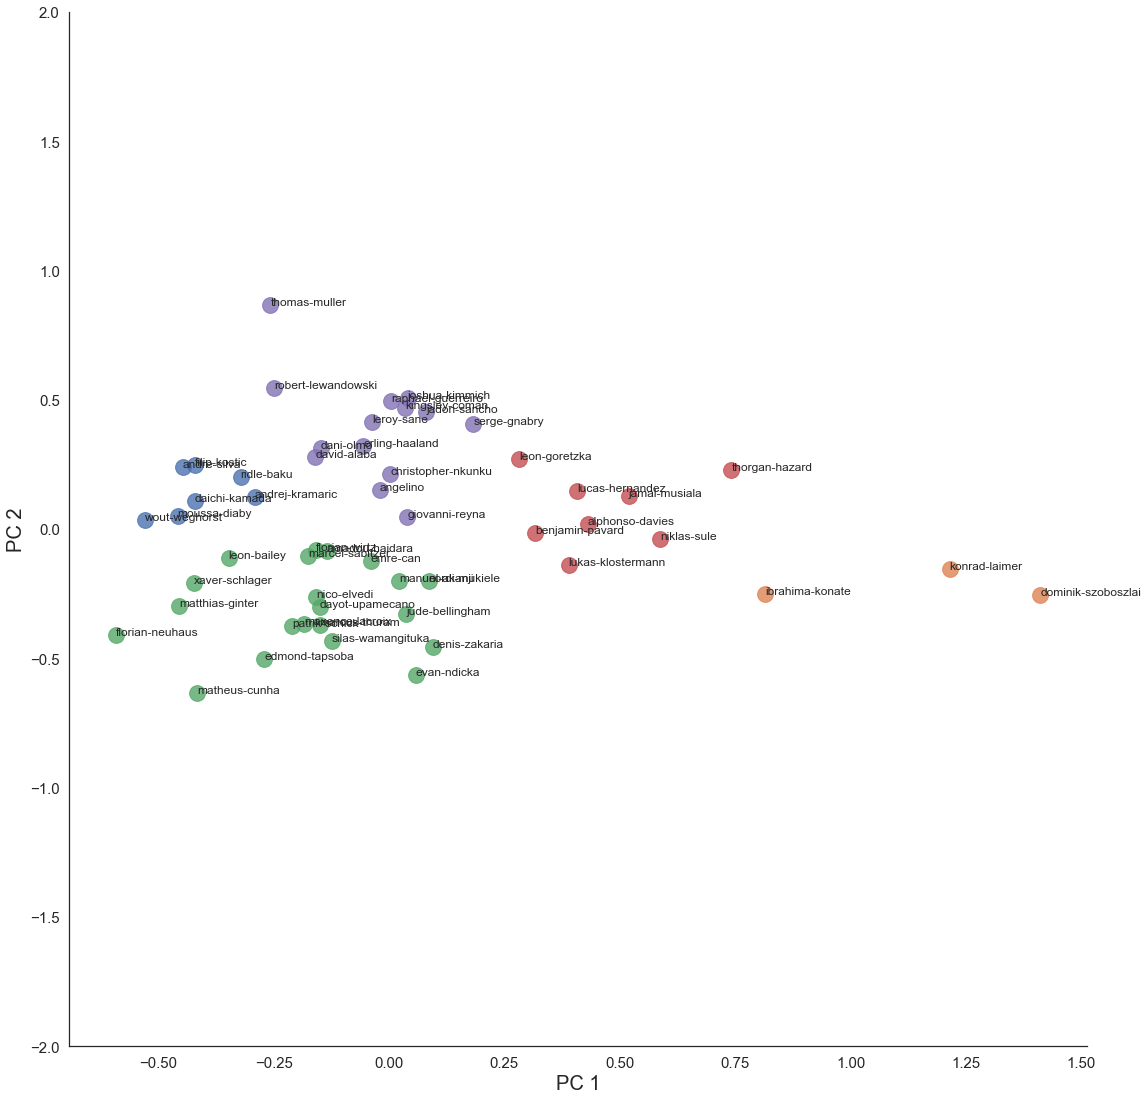

In [256]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()